In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas
import numpy as np

## Reading in data

In [36]:
df = pd.read_csv('../datasets/processed/arrests2025_cleaned.csv')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MIN_AGE,MAX_AGE,DAY_OF_WEEK,MONTH
0,298799078,2025-01-02 00:00:00.000000000,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,...,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718),25,44,Thursday,January
1,299008265,2025-01-07 00:00:00.000000000,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,...,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086),45,64,Tuesday,January
2,298969999,2025-01-06 00:00:00.000000000,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,M,5,...,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526),25,44,Monday,January
3,299436365,2025-01-14 00:00:00.000000000,157,RAPE 1,104.0,RAPE,PL 130352B,F,Q,112,...,BLACK,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758),45,64,Tuesday,January
4,299562518,2025-01-16 00:00:00.000000000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,F,M,26,...,BLACK,996342,236149,40.814853,-73.956314,POINT (-73.956314 40.814853),0,17,Thursday,January


## Cleaning Values

In [37]:
# Making the Borough name Accurate
borough_mapping = {
    'B': 'Bronx',
    'K': 'Brooklyn',
    'M': 'Manhattan',
    'Q': 'Queens',
    'S': 'Staten Island'
}

df['ARREST_BORO'] = df['ARREST_BORO'].map(borough_mapping)
df['ARREST_BORO'].value_counts()

ARREST_BORO
Brooklyn         20024
Manhattan        17067
Bronx            15776
Queens           15154
Staten Island     3007
Name: count, dtype: int64

In [38]:
# Making the Law Code name Accurate
borough_mapping = {
    'F': 'Felony',
    'M': 'Misdemeanor',
    'V': 'Violation'
}

df['LAW_CAT_CD'] = df['LAW_CAT_CD'].map(borough_mapping)
df['LAW_CAT_CD'].value_counts()

LAW_CAT_CD
Misdemeanor    41809
Felony         27597
Violation        960
Name: count, dtype: int64

In [39]:
gender_mapping = {
    'M': 'Male',
    'F': 'Female'
}
df['PERP_SEX'] = df['PERP_SEX'].map(gender_mapping)
df['PERP_SEX'].value_counts()

PERP_SEX
Male      58528
Female    12500
Name: count, dtype: int64

In [40]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MIN_AGE,MAX_AGE,DAY_OF_WEEK,MONTH
0,298799078,2025-01-02 00:00:00.000000000,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Manhattan,23,...,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718),25,44,Thursday,January
1,299008265,2025-01-07 00:00:00.000000000,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,Felony,Queens,113,...,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086),45,64,Tuesday,January
2,298969999,2025-01-06 00:00:00.000000000,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,Felony,Manhattan,5,...,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526),25,44,Monday,January
3,299436365,2025-01-14 00:00:00.000000000,157,RAPE 1,104.0,RAPE,PL 130352B,Felony,Queens,112,...,BLACK,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758),45,64,Tuesday,January
4,299562518,2025-01-16 00:00:00.000000000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,Felony,Manhattan,26,...,BLACK,996342,236149,40.814853,-73.956314,POINT (-73.956314 40.814853),0,17,Thursday,January


In [41]:
# Categorical Ordering
desired_order = ['<18', '18-24', '25-44', '45-64', '65+']
month_order = ['January', 'February', 'March']
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
borough_order = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
law_order = ['Felony', 'Misdemeanor', 'Violation' ]
gender_order = ['Male', 'Female']

df['AGE_GROUP'] = pd.Categorical(df['AGE_GROUP'], categories=desired_order, ordered=True)
df['MONTH'] = pd.Categorical(df['MONTH'], categories=month_order, ordered=True)
df['DAY_OF_WEEK'] = pd.Categorical(df['DAY_OF_WEEK'], categories=day_order, ordered=True)
df['ARREST_BORO'] = pd.Categorical(df['ARREST_BORO'], categories=borough_order, ordered=True)
df['LAW_CAT_CD'] = pd.Categorical(df['LAW_CAT_CD'], categories=law_order, ordered=True)
df['PERP_SEX'] = pd.Categorical(df['PERP_SEX'], categories=gender_order, ordered=True)

df.sort_values(['ARREST_BORO','MONTH', 'DAY_OF_WEEK', 'LAW_CAT_CD', 'AGE_GROUP', 'PERP_SEX'])

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MIN_AGE,MAX_AGE,DAY_OF_WEEK,MONTH
6479,298916393,2025-01-05 00:00:00.000000000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,Felony,Bronx,49,...,BLACK HISPANIC,1019581,245907,40.841573,-73.872310,POINT (-73.87231 40.841573),0,17,Sunday,January
6554,299710201,2025-01-19 00:00:00.000000000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,Felony,Bronx,47,...,BLACK,1022324,259342,40.878434,-73.862319,POINT (-73.862319 40.878434),0,17,Sunday,January
6861,299710203,2025-01-19 00:00:00.000000000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,Felony,Bronx,47,...,BLACK,1022324,259342,40.878434,-73.862319,POINT (-73.862319 40.878434),0,17,Sunday,January
9643,298939027,2025-01-05 00:00:00.000000000,405,"LARCENY,GRAND BY THEFT OF CREDIT CARD",109.0,GRAND LARCENY,PL 1553010,Felony,Bronx,48,...,BLACK,1015230,251084,40.855798,-73.888009,POINT (-73.888009 40.855798),0,17,Sunday,January
19008,299695864,2025-01-19 00:00:00.000000000,268,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,Felony,Bronx,47,...,WHITE HISPANIC,1021972,265517,40.895376,-73.863557,POINT (-73.86355749899745 40.895375906917266),0,17,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50354,302289073,2025-03-08 00:00:00.000000000,922,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,Misdemeanor,Staten Island,120,...,WHITE,962541,163515,40.615461,-74.078193,POINT (-74.07819332308526 40.61546069195117),45,64,Saturday,March
51562,301897951,2025-03-01 00:00:00.000000000,339,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,Misdemeanor,Staten Island,122,...,WHITE,954771,148450,40.574099,-74.106114,POINT (-74.106114 40.574099),45,64,Saturday,March
52319,302873212,2025-03-15 00:00:00.000000000,511,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,Misdemeanor,Staten Island,121,...,BLACK,938125,170979,40.635854,-74.166188,POINT (-74.166187798588 40.635854305948776),65,99,Saturday,March
56800,303837246,2025-03-29 00:00:00.000000000,637,"HARASSMENT,SUBD 1,CIVILIAN",578.0,HARRASSMENT 2,PL 2402601,Violation,Staten Island,121,...,BLACK,942827,166373,40.623246,-74.149218,POINT (-74.149218 40.623246),25,44,Saturday,March


In [42]:
conditions = [
    df['JURISDICTION_CODE'] == 0,
    df['JURISDICTION_CODE'] == 1,
    df['JURISDICTION_CODE'] == 2,
    df['JURISDICTION_CODE'] >= 3
]

choices = [
    'Patrol (NYPD)',
    'Transit (NYPD)',
    'Housing (NYPD)',
    'Other Non-NYPD'
]

df['JURISDICTION_DESC'] = np.select(conditions, choices, default='Unknown Jurisdiction')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MIN_AGE,MAX_AGE,DAY_OF_WEEK,MONTH,JURISDICTION_DESC
0,298799078,2025-01-02 00:00:00.000000000,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Manhattan,23,...,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718),25,44,Thursday,January,Patrol (NYPD)
1,299008265,2025-01-07 00:00:00.000000000,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,Felony,Queens,113,...,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086),45,64,Tuesday,January,Patrol (NYPD)
2,298969999,2025-01-06 00:00:00.000000000,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,Felony,Manhattan,5,...,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526),25,44,Monday,January,Other Non-NYPD
3,299436365,2025-01-14 00:00:00.000000000,157,RAPE 1,104.0,RAPE,PL 130352B,Felony,Queens,112,...,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758),45,64,Tuesday,January,Patrol (NYPD)
4,299562518,2025-01-16 00:00:00.000000000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,Felony,Manhattan,26,...,996342,236149,40.814853,-73.956314,POINT (-73.956314 40.814853),0,17,Thursday,January,Patrol (NYPD)


## Top 5 Offense Filtering

In [43]:
# top 5 filtering
top5 = [
    "ASSAULT 3 & RELATED OFFENSES",
    "PETIT LARCENY",
    "DANGEROUS DRUGS",
    "FELONY ASSAULT",
    "MISCELLANEOUS PENAL LAW"
]

df_adjusted = df[df['OFNS_DESC'].isin(top5)]

## Reordering

In [44]:
final_column_order = [
    'ARREST_DATE',
    'ARREST_BORO', 
    'OFNS_DESC', 
    'LAW_CAT_CD', 
    'MONTH',
    'DAY_OF_WEEK',
    'ARREST_PRECINCT',
    'JURISDICTION_CODE', 
    'JURISDICTION_DESC',
    'AGE_GROUP', 
    'MIN_AGE',
    'MAX_AGE',  
    'PERP_SEX', 
    'PERP_RACE'
]

df_adjusted = df_adjusted[final_column_order]
df_adjusted.head()

,ARREST_DATE,ARREST_BORO,OFNS_DESC,LAW_CAT_CD,MONTH,DAY_OF_WEEK,ARREST_PRECINCT,JURISDICTION_CODE,JURISDICTION_DESC,AGE_GROUP,MIN_AGE,MAX_AGE,PERP_SEX,PERP_RACE
0,2025-01-02 00:00:00.000000000,Manhattan,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,January,Thursday,23,0,Patrol (NYPD),25-44,25,44,Female,BLACK
1,2025-01-07 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,January,Tuesday,113,0,Patrol (NYPD),45-64,45,64,Male,BLACK
5,2025-01-19 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,January,Sunday,113,0,Patrol (NYPD),18-24,18,24,Male,BLACK
6,2025-01-21 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,January,Tuesday,101,0,Patrol (NYPD),45-64,45,64,Female,BLACK
9,2025-02-05 00:00:00.000000000,Queens,FELONY ASSAULT,Felony,February,Wednesday,103,0,Patrol (NYPD),25-44,25,44,Male,BLACK


In [68]:
final_cols = ['ARREST_BORO', 'OFNS_DESC', 'LAW_CAT_CD', 'MONTH', 'DAY_OF_WEEK', 'AGE_GROUP', 'PERP_SEX','PERP_RACE']
df_adjusted.sort_values(final_cols)

,ARREST_DATE,ARREST_BORO,OFNS_DESC,LAW_CAT_CD,MONTH,DAY_OF_WEEK,ARREST_PRECINCT,JURISDICTION_CODE,JURISDICTION_DESC,AGE_GROUP,MIN_AGE,MAX_AGE,PERP_SEX,PERP_RACE
10566,2025-01-22 00:00:00.000000000,Bronx,ASSAULT 3 & RELATED OFFENSES,Felony,January,Wednesday,48,0,Patrol (NYPD),25-44,25,44,Male,BLACK
3572,2025-01-01 00:00:00.000000000,Bronx,ASSAULT 3 & RELATED OFFENSES,Felony,January,Wednesday,42,0,Patrol (NYPD),25-44,25,44,Male,WHITE HISPANIC
69575,2025-03-10 00:00:00.000000000,Bronx,ASSAULT 3 & RELATED OFFENSES,Felony,March,Monday,49,0,Patrol (NYPD),25-44,25,44,Male,BLACK
18791,2025-01-26 00:00:00.000000000,Bronx,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,January,Sunday,43,0,Patrol (NYPD),<18,0,17,Male,BLACK
15126,2025-01-05 00:00:00.000000000,Bronx,ASSAULT 3 & RELATED OFFENSES,Misdemeanor,January,Sunday,43,2,Housing (NYPD),<18,0,17,Male,BLACK HISPANIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29400,2025-03-01 00:00:00.000000000,Staten Island,PETIT LARCENY,Misdemeanor,March,Saturday,122,0,Patrol (NYPD),45-64,45,64,Female,WHITE
39750,2025-03-01 00:00:00.000000000,Staten Island,PETIT LARCENY,Misdemeanor,March,Saturday,122,0,Patrol (NYPD),45-64,45,64,Female,WHITE
46601,2025-03-22 00:00:00.000000000,Staten Island,PETIT LARCENY,Misdemeanor,March,Saturday,122,0,Patrol (NYPD),45-64,45,64,Female,WHITE
47764,2025-03-01 00:00:00.000000000,Staten Island,PETIT LARCENY,Misdemeanor,March,Saturday,121,0,Patrol (NYPD),45-64,45,64,Female,WHITE


## Ploting

In [69]:
sns.set_theme()
sns.set_palette("pastel")


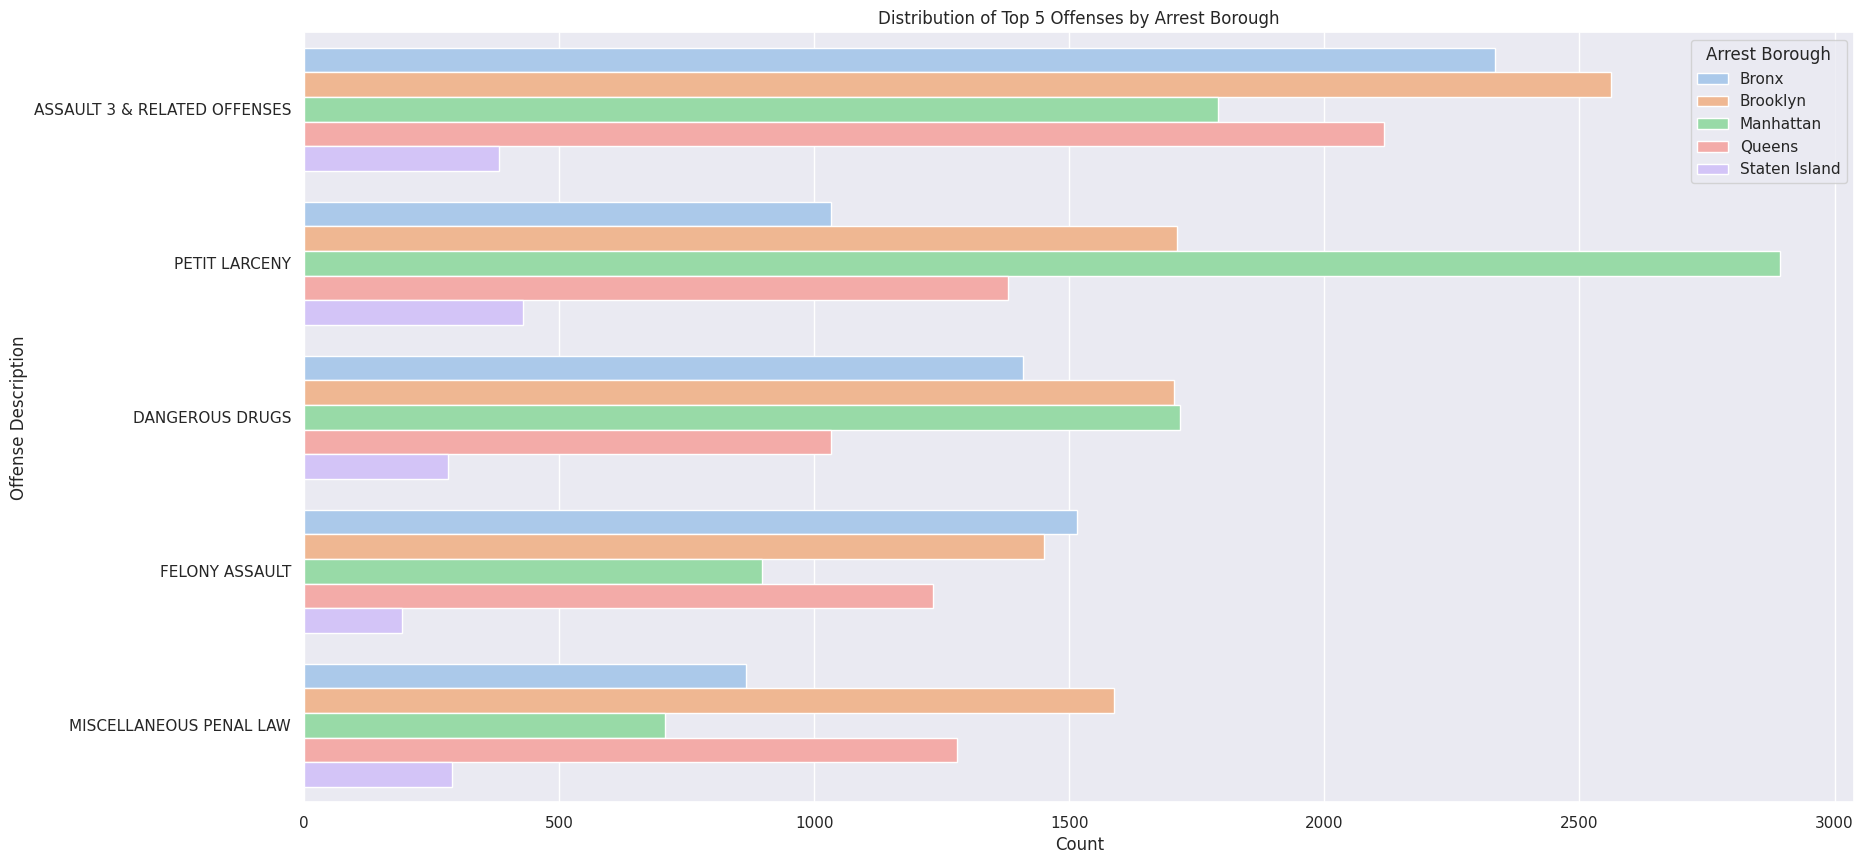

In [72]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='OFNS_DESC', hue='ARREST_BORO', order=df_adjusted['OFNS_DESC'].value_counts().index)
plt.title('Distribution of Top 5 Offenses by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Offense Description')
plt.legend(title='Arrest Borough')
plt.show()

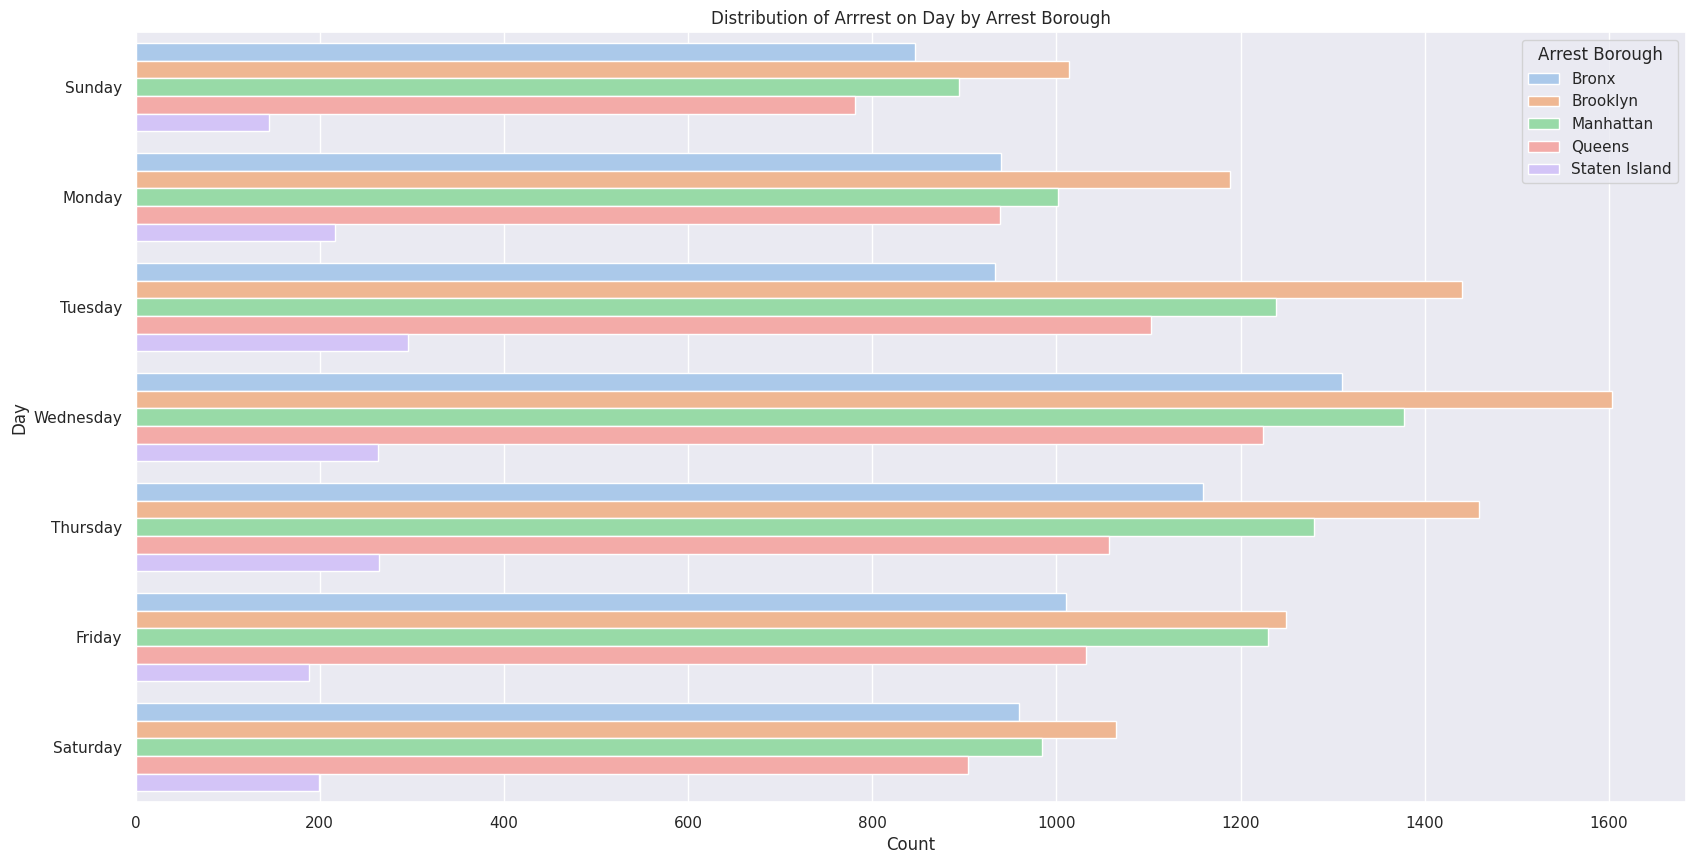

In [74]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='DAY_OF_WEEK', hue='ARREST_BORO', order=day_order)
plt.title('Distribution of Arrrest on Day by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Day')
plt.legend(title='Arrest Borough')
plt.show()

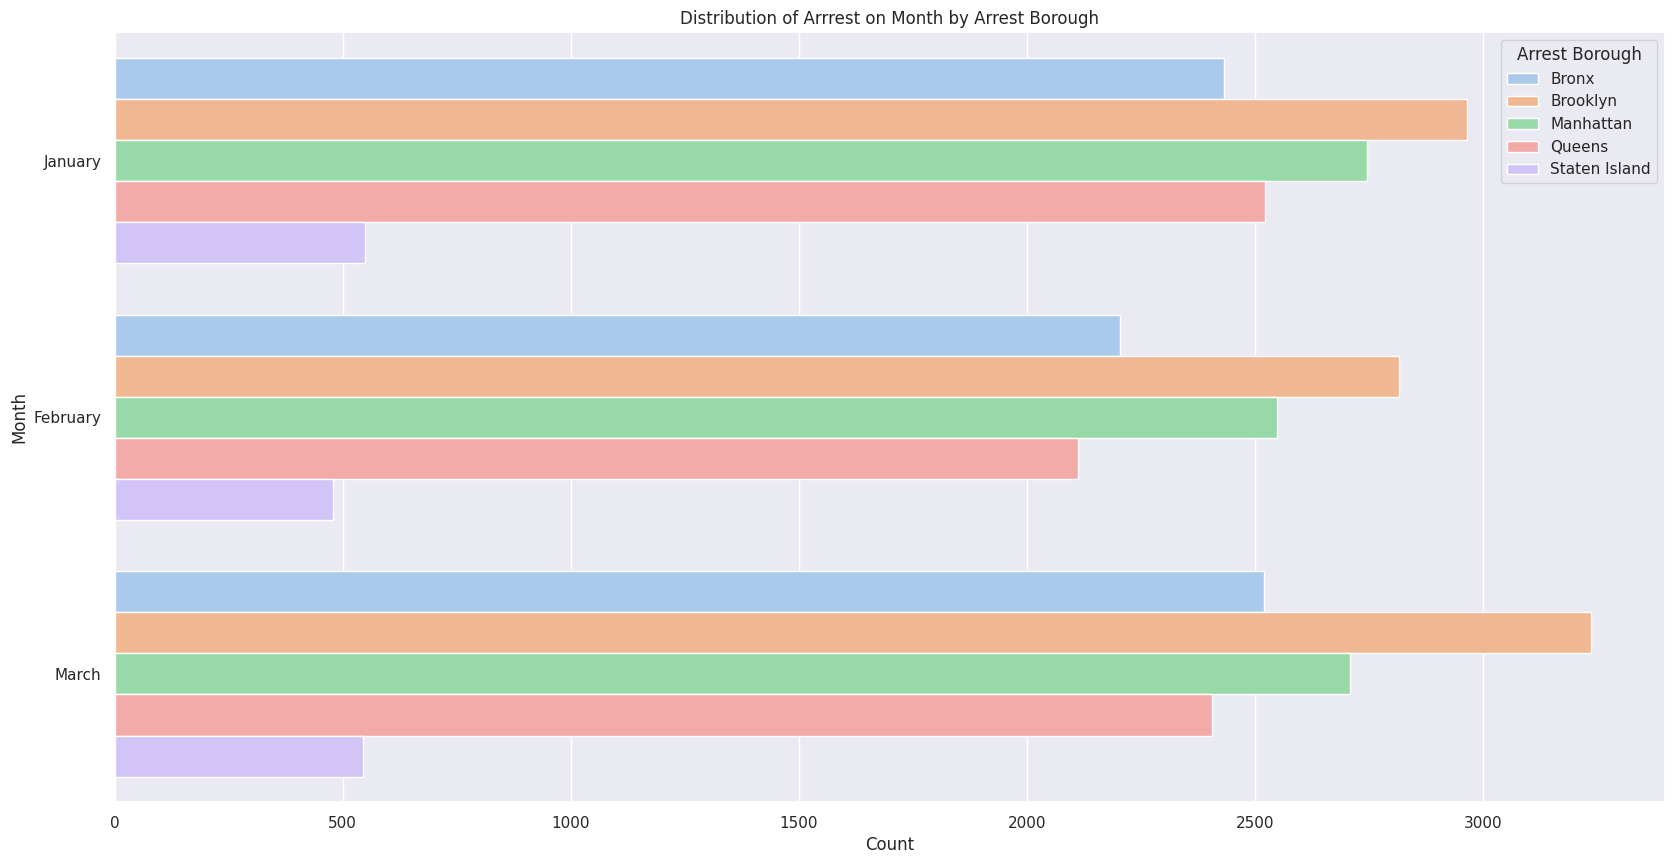

In [76]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='MONTH', hue='ARREST_BORO', order=month_order)
plt.title('Distribution of Arrrest on Month by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Month')
plt.legend(title='Arrest Borough')
plt.show()

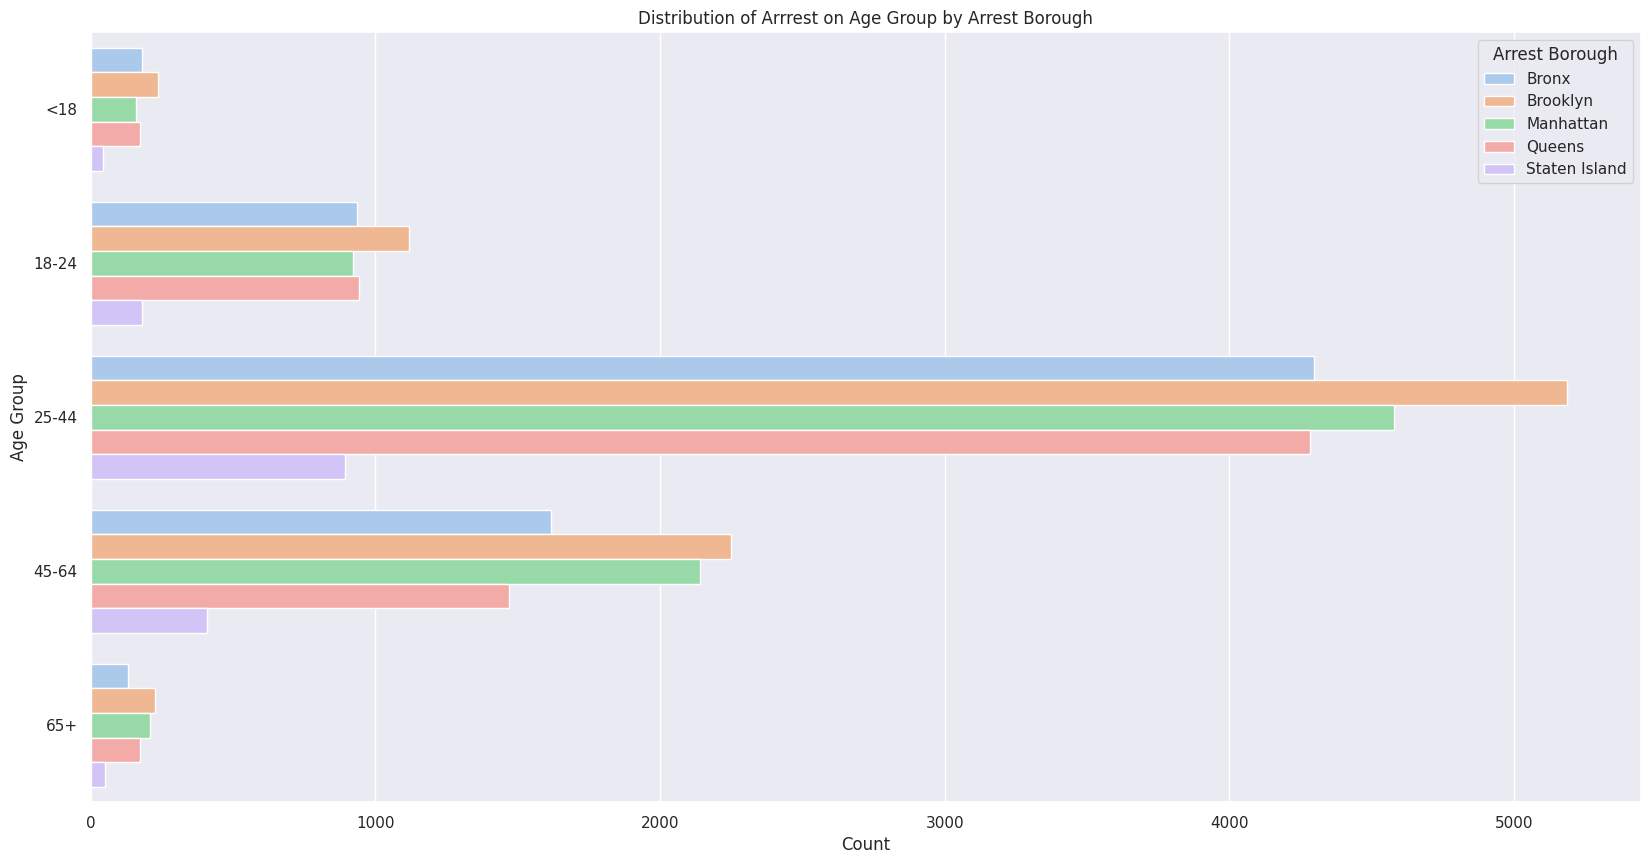

In [80]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='ARREST_BORO', order=desired_order)
plt.title('Distribution of Arrrest on Age Group by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Arrest Borough')
plt.show()

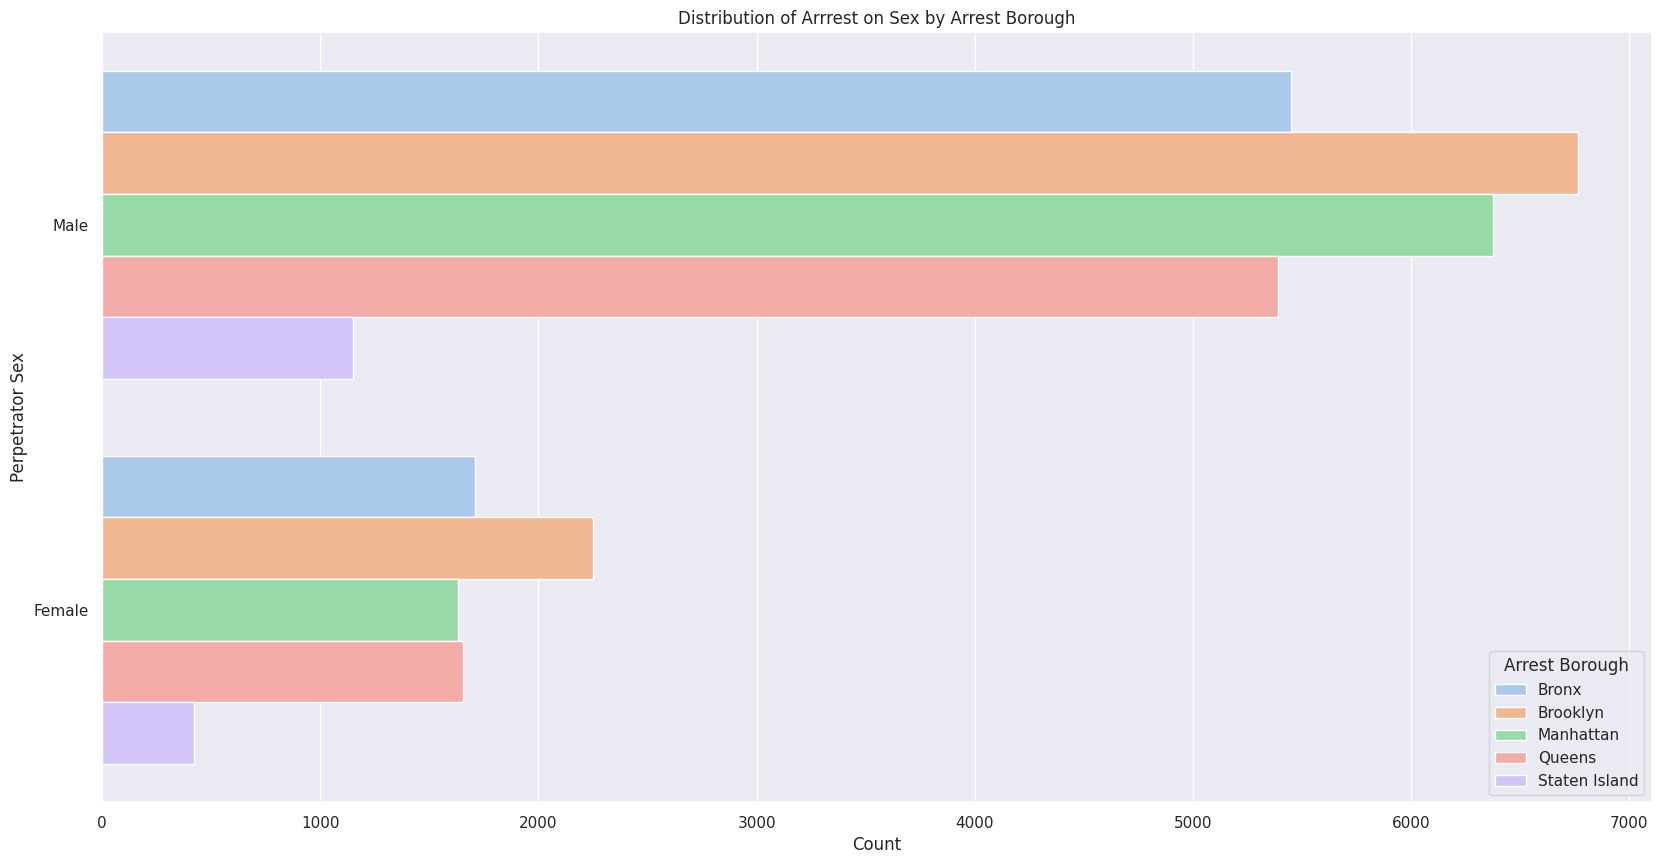

In [79]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='PERP_SEX', hue='ARREST_BORO', order=gender_order)
plt.title('Distribution of Arrrest on Sex by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Perpetrator Sex')
plt.legend(title='Arrest Borough')
plt.show()

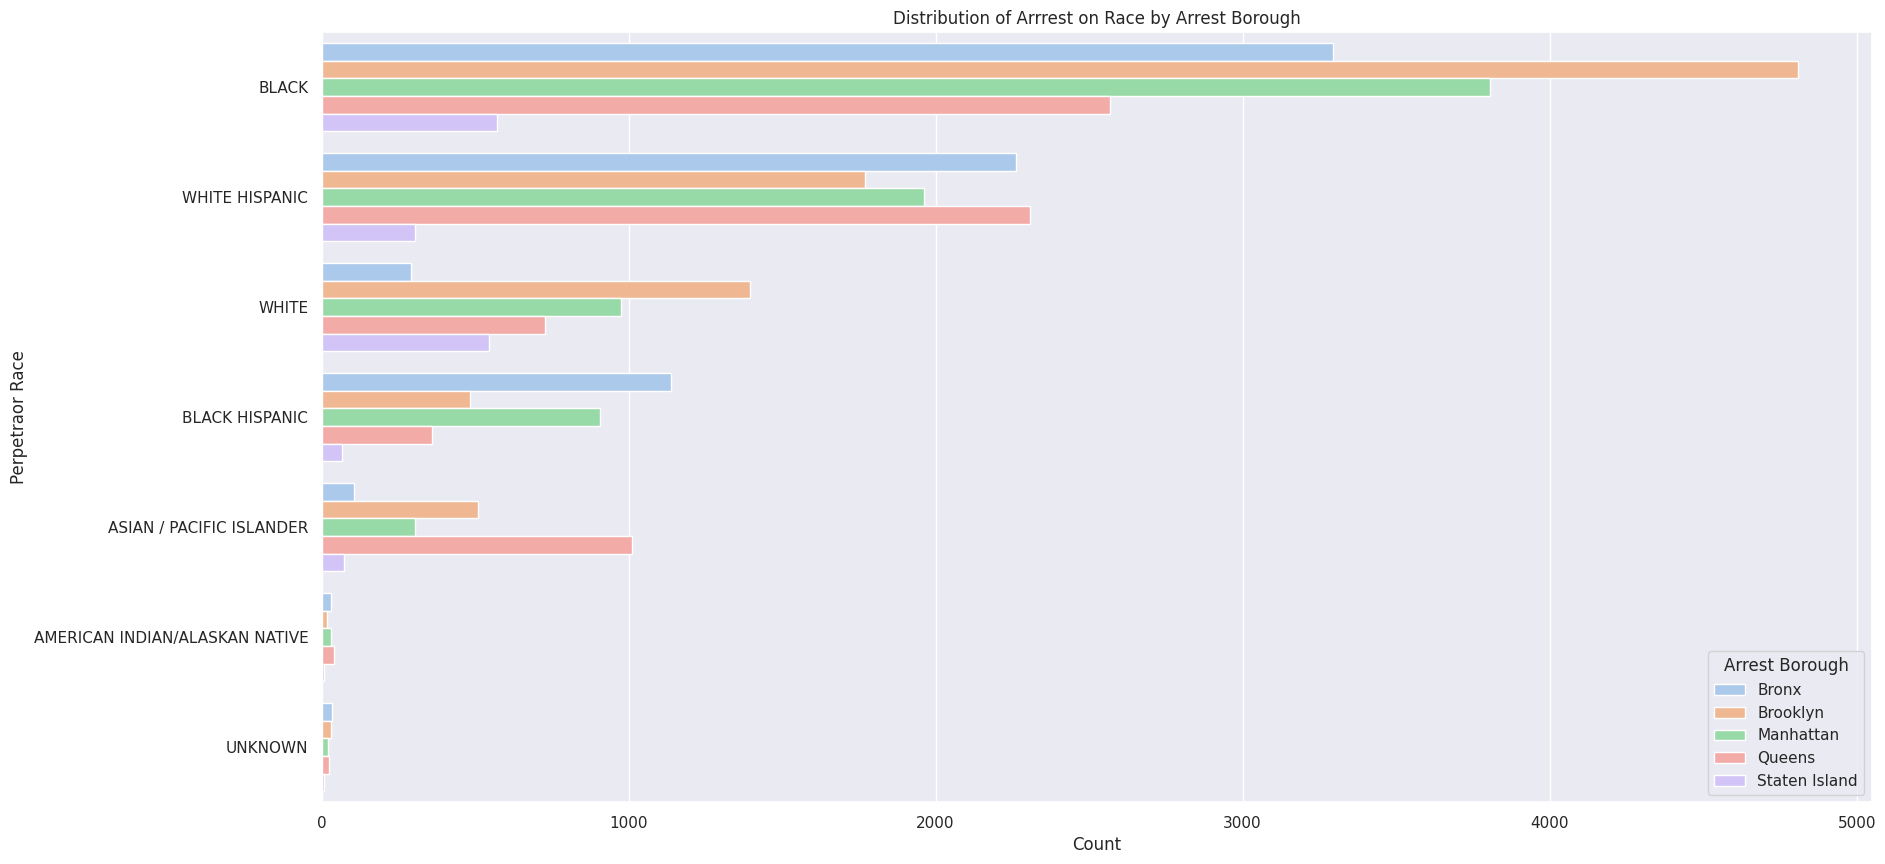

In [81]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='PERP_RACE', hue='ARREST_BORO', order=df_adjusted['PERP_RACE'].value_counts().index)
plt.title('Distribution of Arrrest on Race by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Perpetraor Race')
plt.legend(title='Arrest Borough')
plt.show()

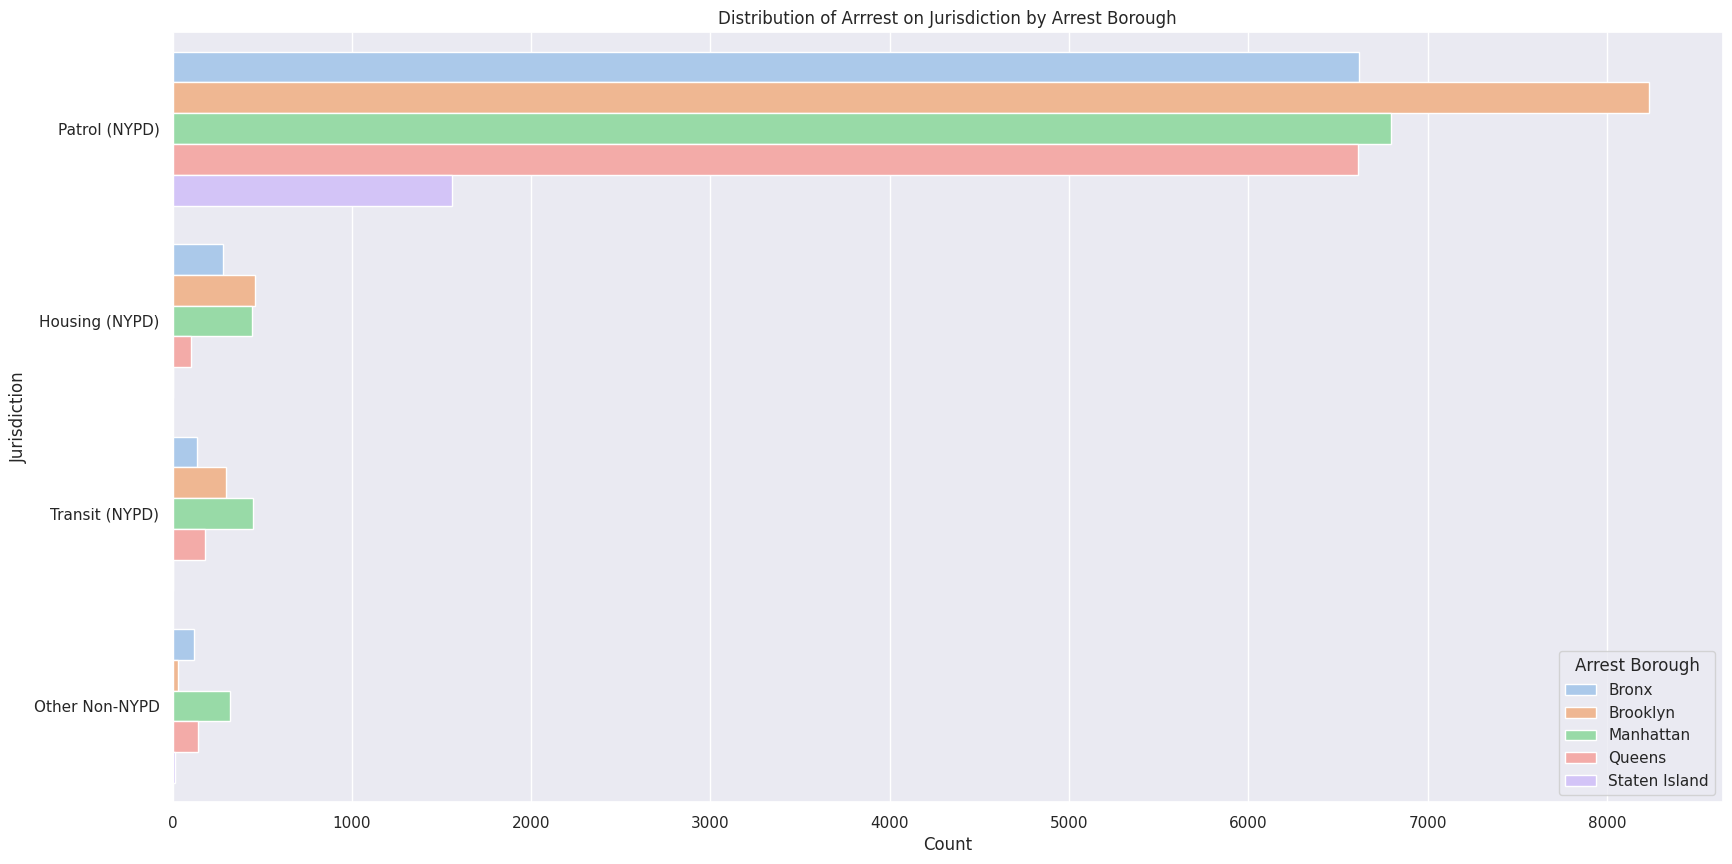

In [95]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='JURISDICTION_DESC', hue='ARREST_BORO', order=df_adjusted['JURISDICTION_DESC'].value_counts().index)
plt.title('Distribution of Arrrest on Jurisdiction by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Jurisdiction')
plt.legend(title='Arrest Borough')
plt.show()

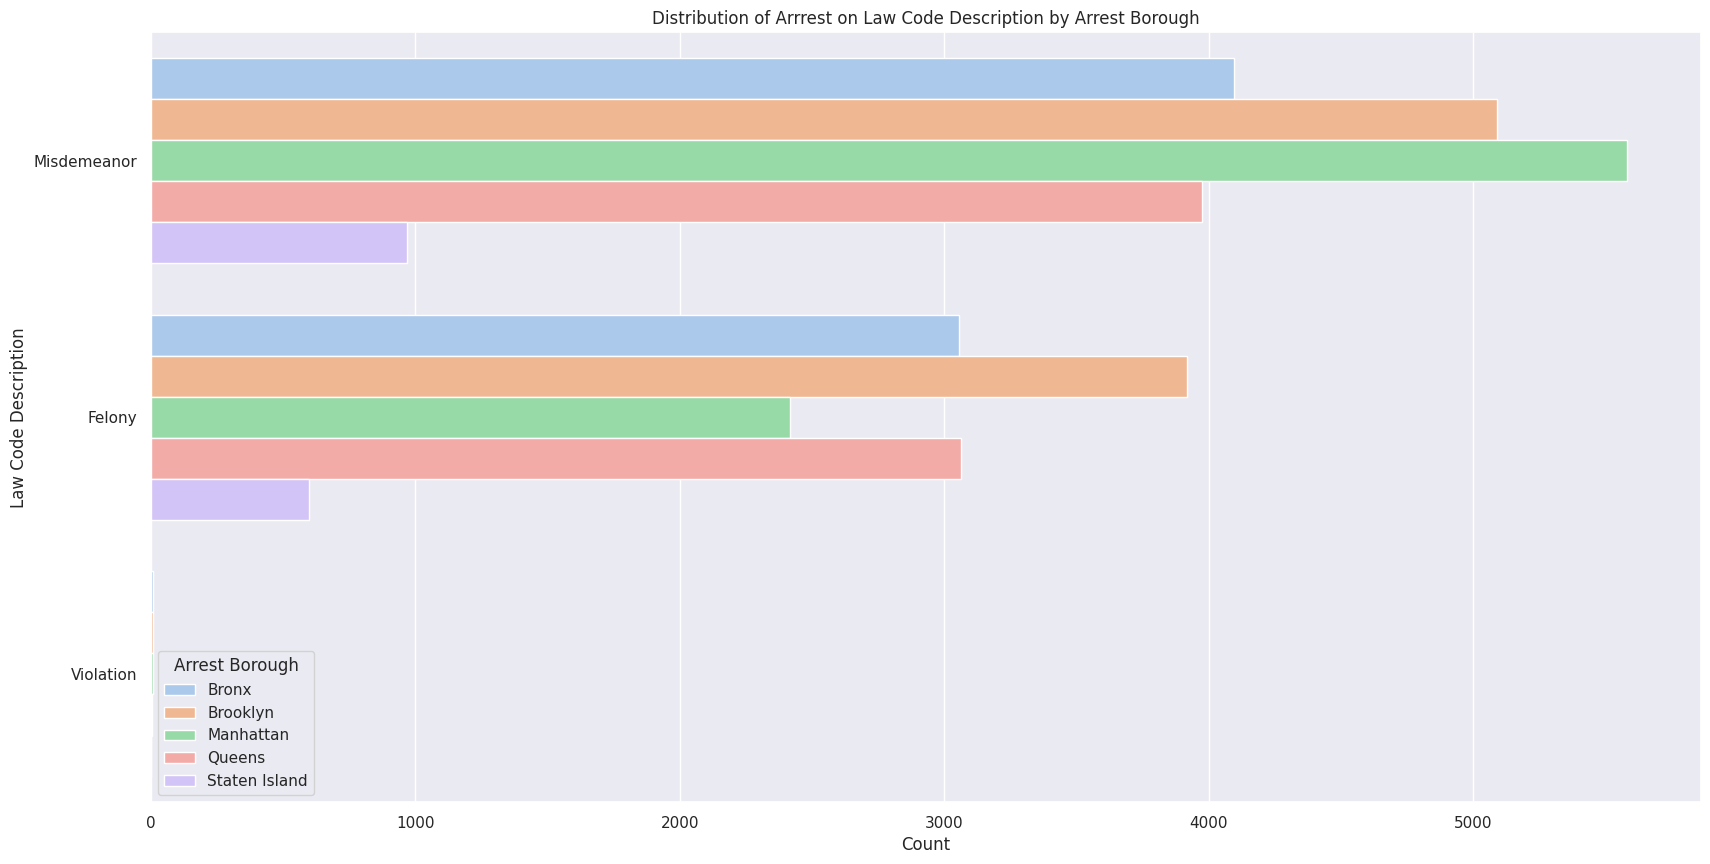

In [96]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='LAW_CAT_CD', hue='ARREST_BORO', order=df_adjusted['LAW_CAT_CD'].value_counts().index)
plt.title('Distribution of Arrrest on Law Code Description by Arrest Borough')
plt.xlabel('Count')
plt.ylabel('Law Code Description')
plt.legend(title='Arrest Borough')
plt.show()

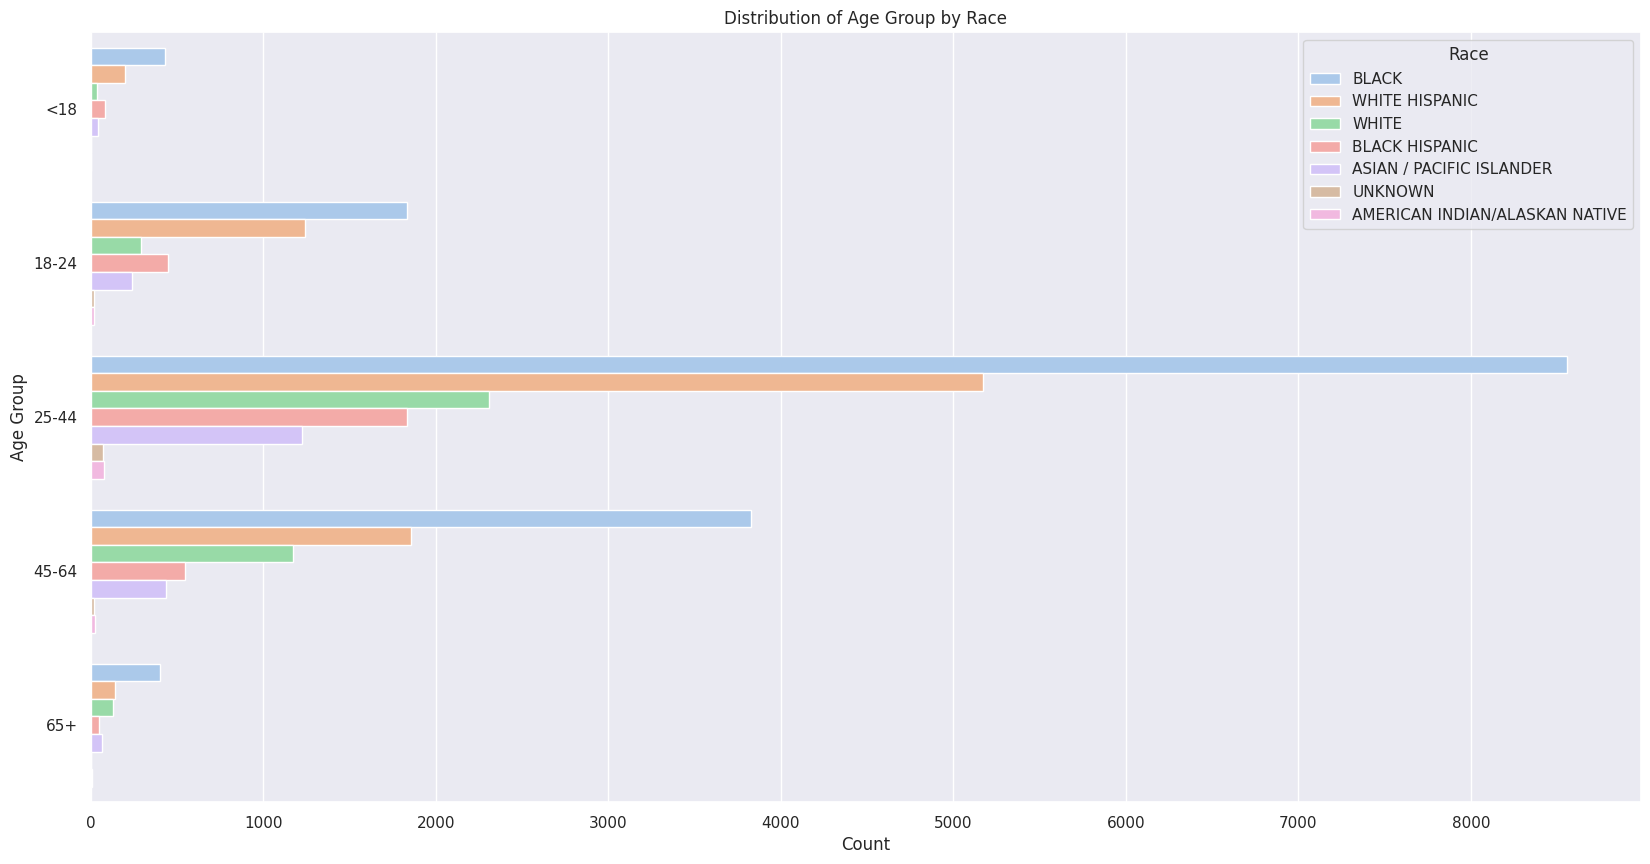

In [84]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='PERP_RACE', order=desired_order)
plt.title('Distribution of Age Group by Race')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Race')
plt.show()

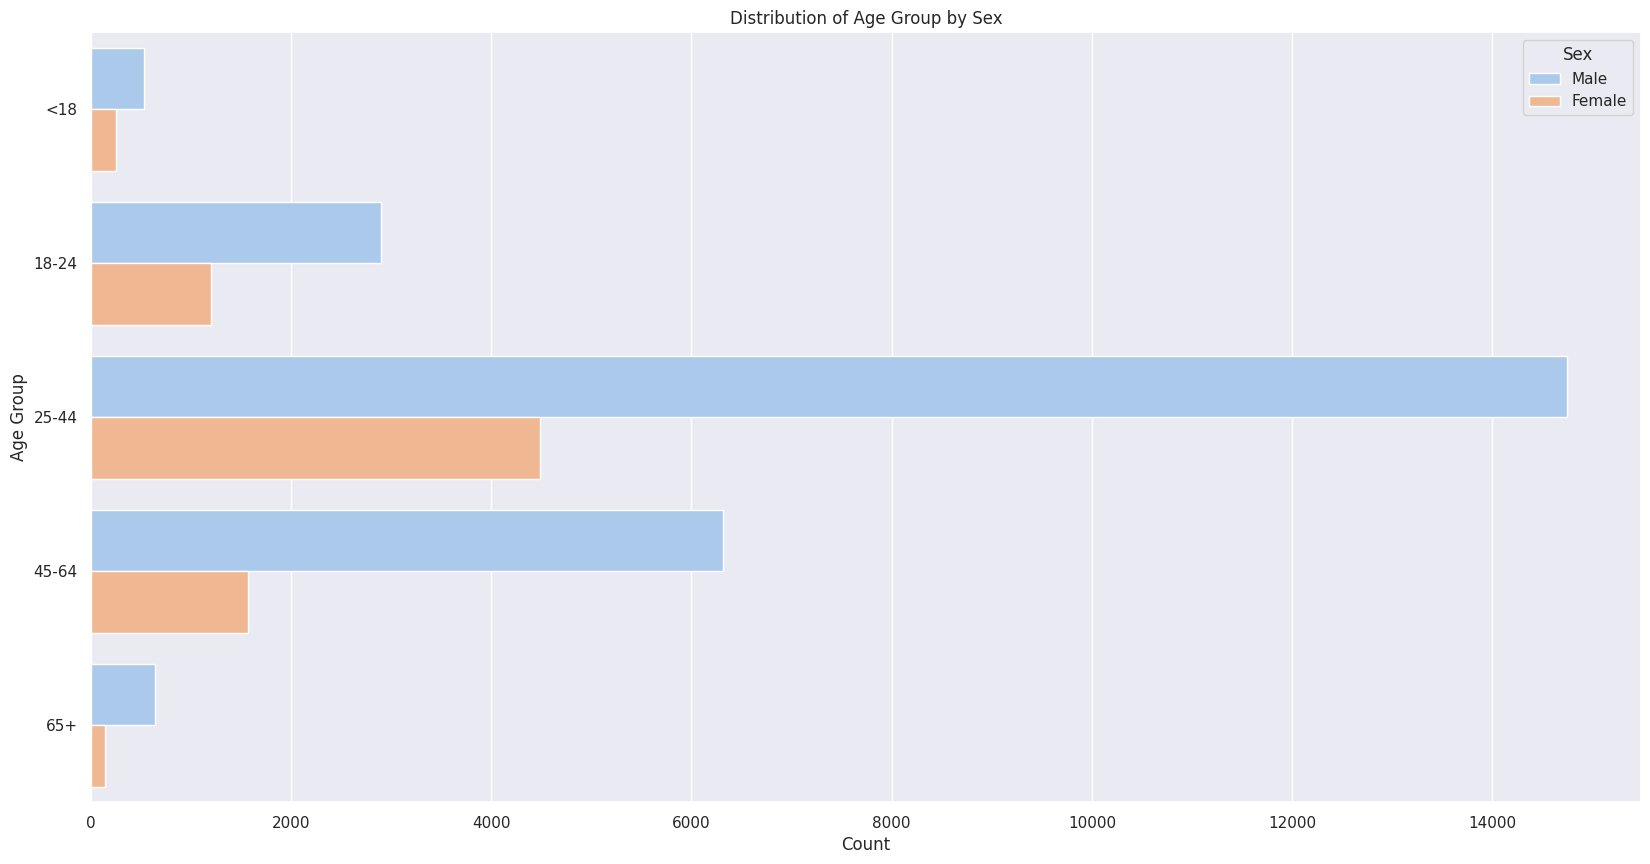

In [85]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='PERP_SEX', order=desired_order)
plt.title('Distribution of Age Group by Sex')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Sex')
plt.show()

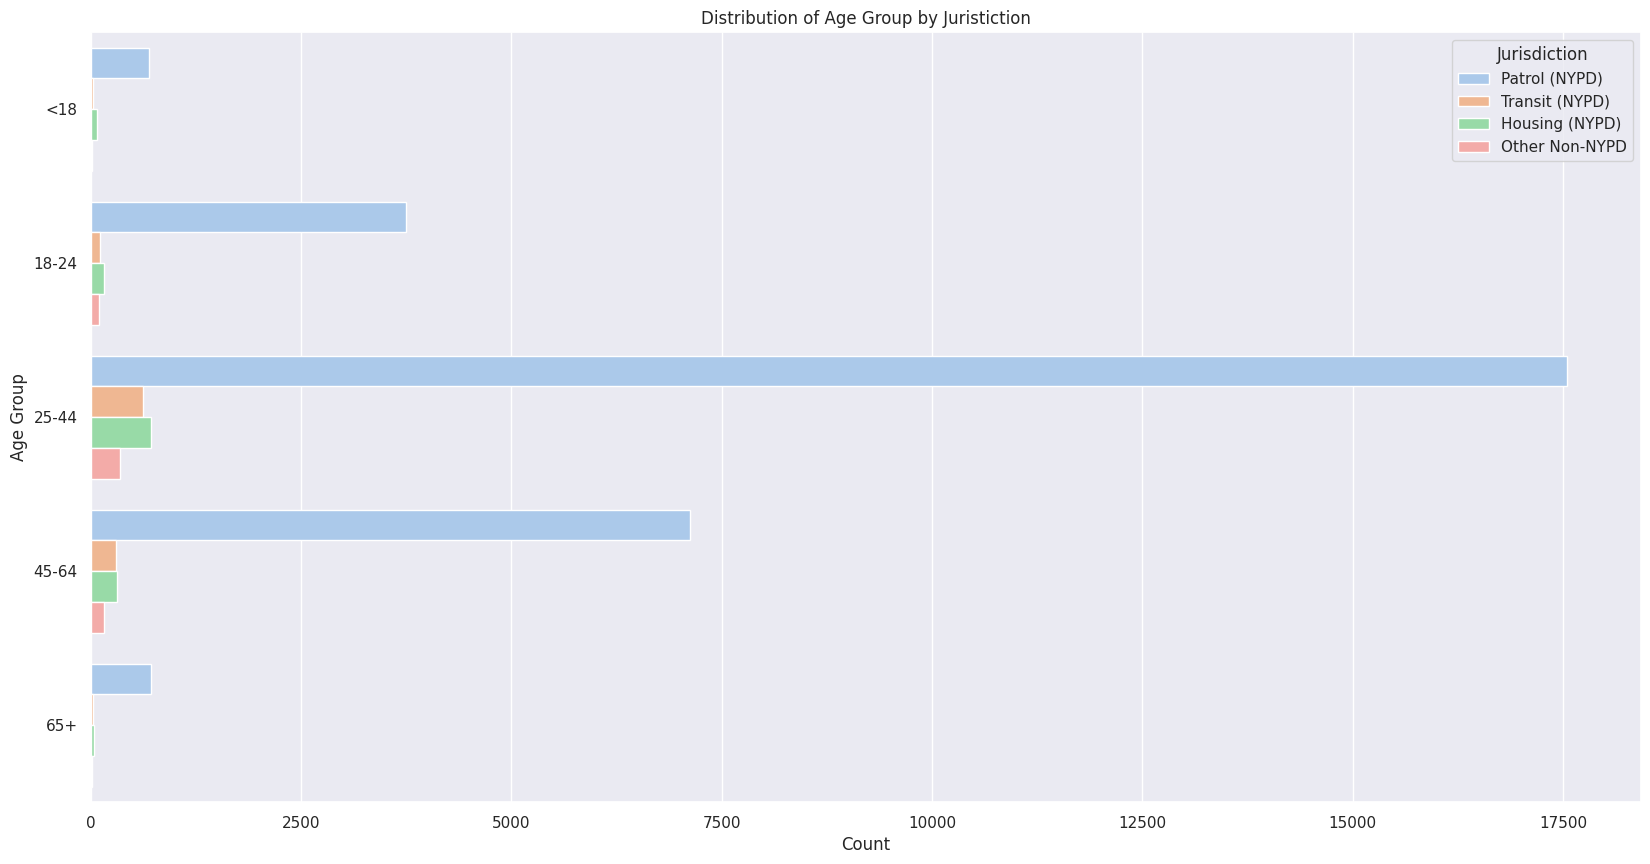

In [86]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='JURISDICTION_DESC', order=desired_order)
plt.title('Distribution of Age Group by Juristiction')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Jurisdiction')
plt.show()

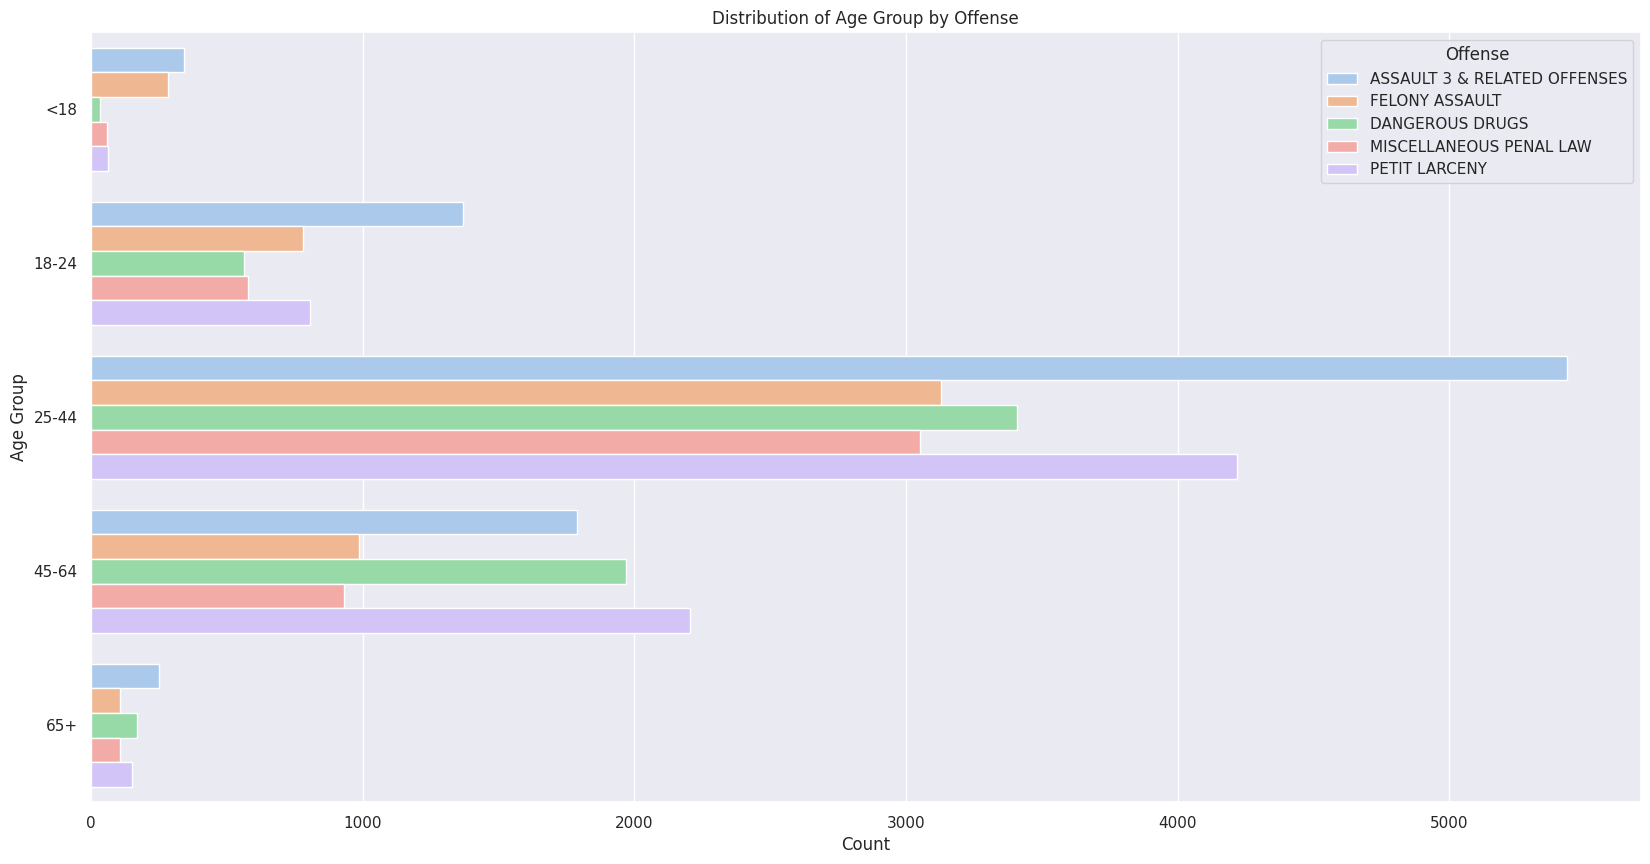

In [87]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='OFNS_DESC', order=desired_order)
plt.title('Distribution of Age Group by Offense')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Offense')
plt.show()

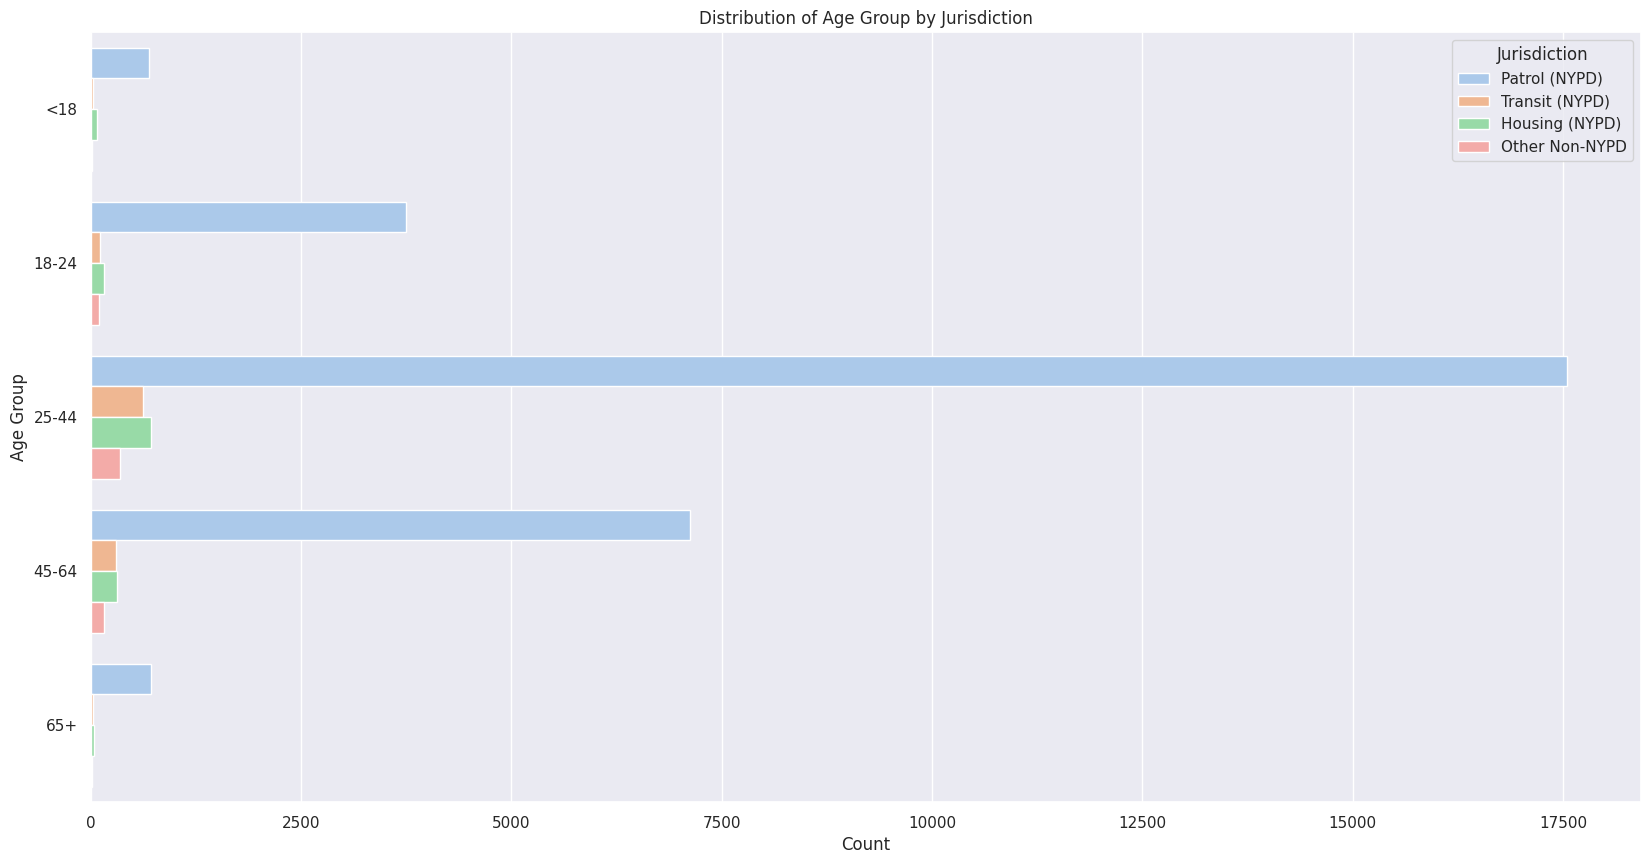

In [97]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='JURISDICTION_DESC', order=desired_order)
plt.title('Distribution of Age Group by Jurisdiction')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Jurisdiction')
plt.show()

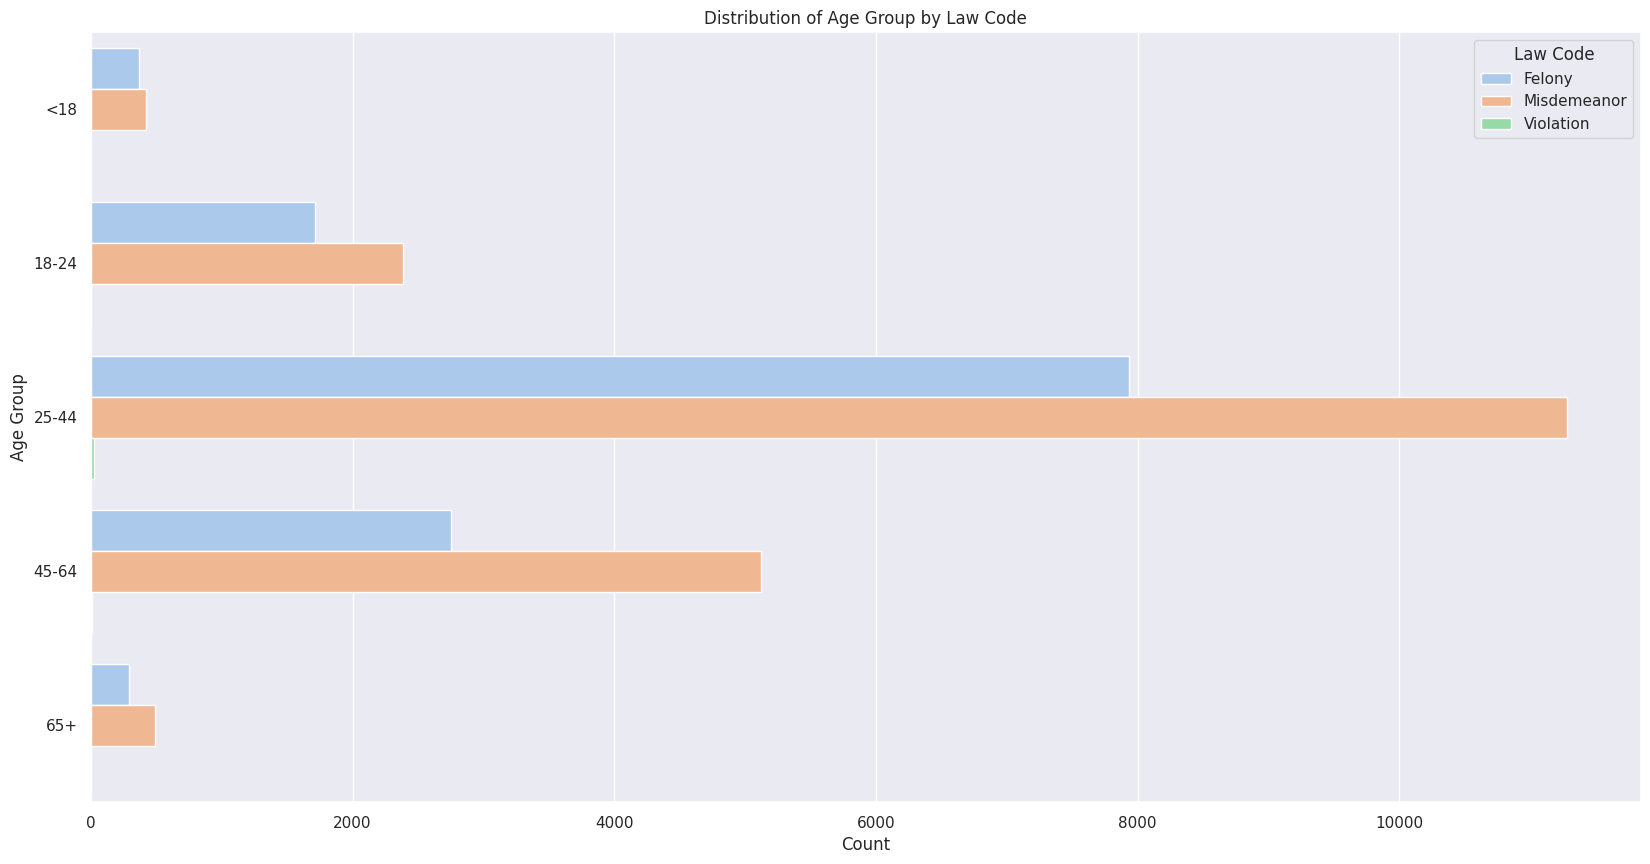

In [98]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='AGE_GROUP', hue='LAW_CAT_CD', order=desired_order)
plt.title('Distribution of Age Group by Law Code')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.legend(title='Law Code')
plt.show()

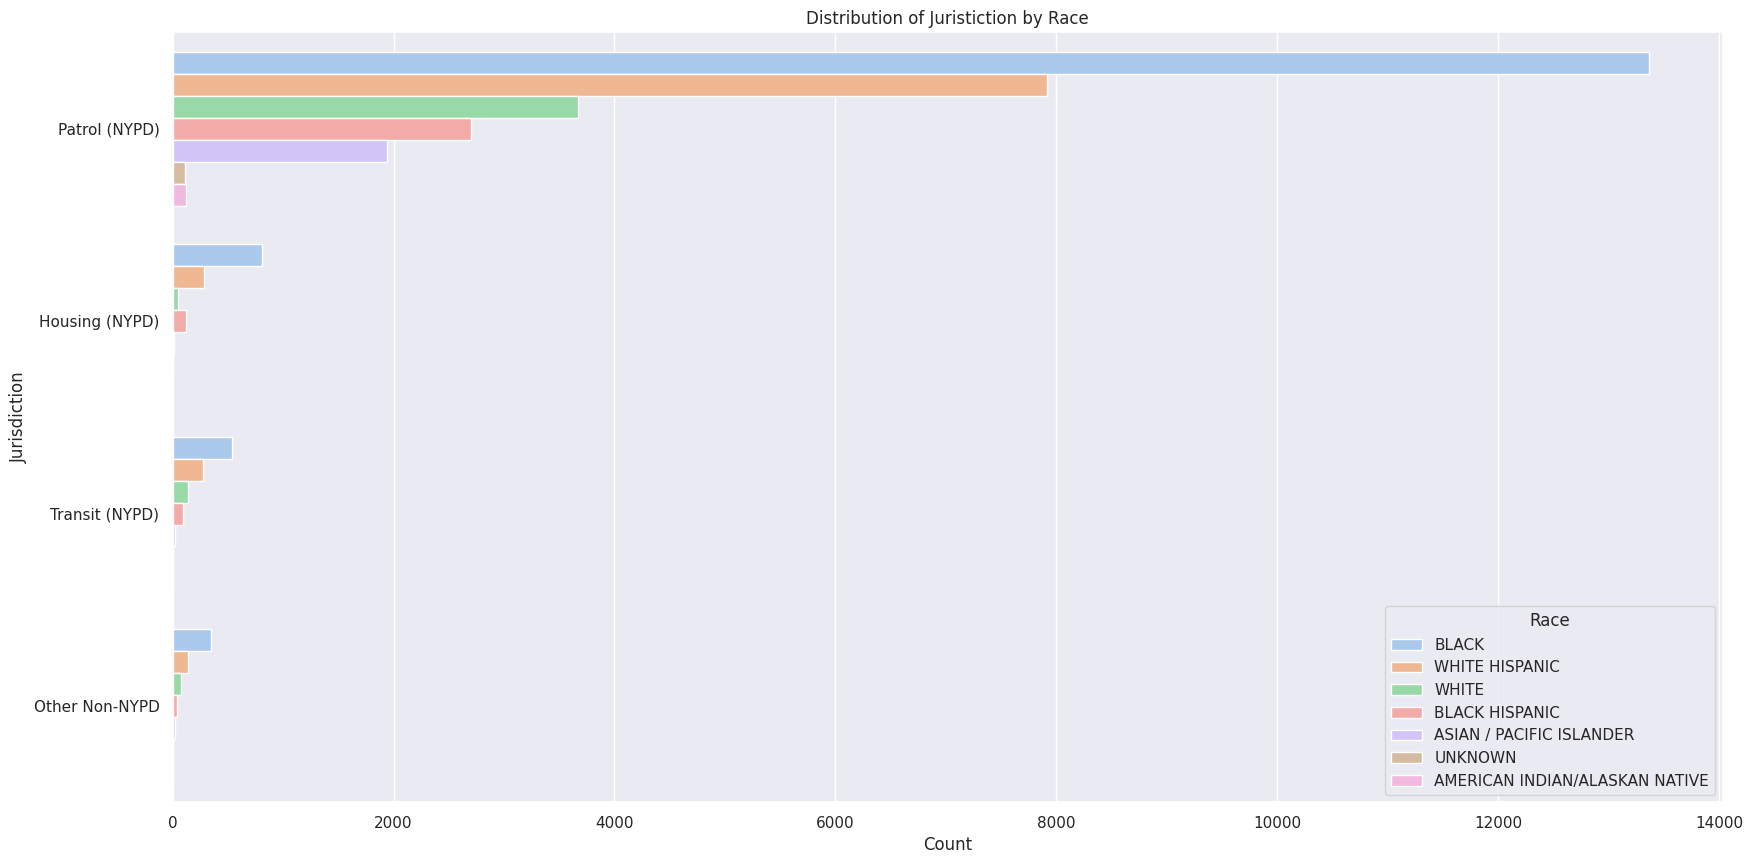

In [91]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='JURISDICTION_DESC', hue='PERP_RACE', order=df_adjusted['JURISDICTION_DESC'].value_counts().index)
plt.title('Distribution of Juristiction by Race')
plt.xlabel('Count')
plt.ylabel('Jurisdiction')
plt.legend(title='Race')
plt.show()

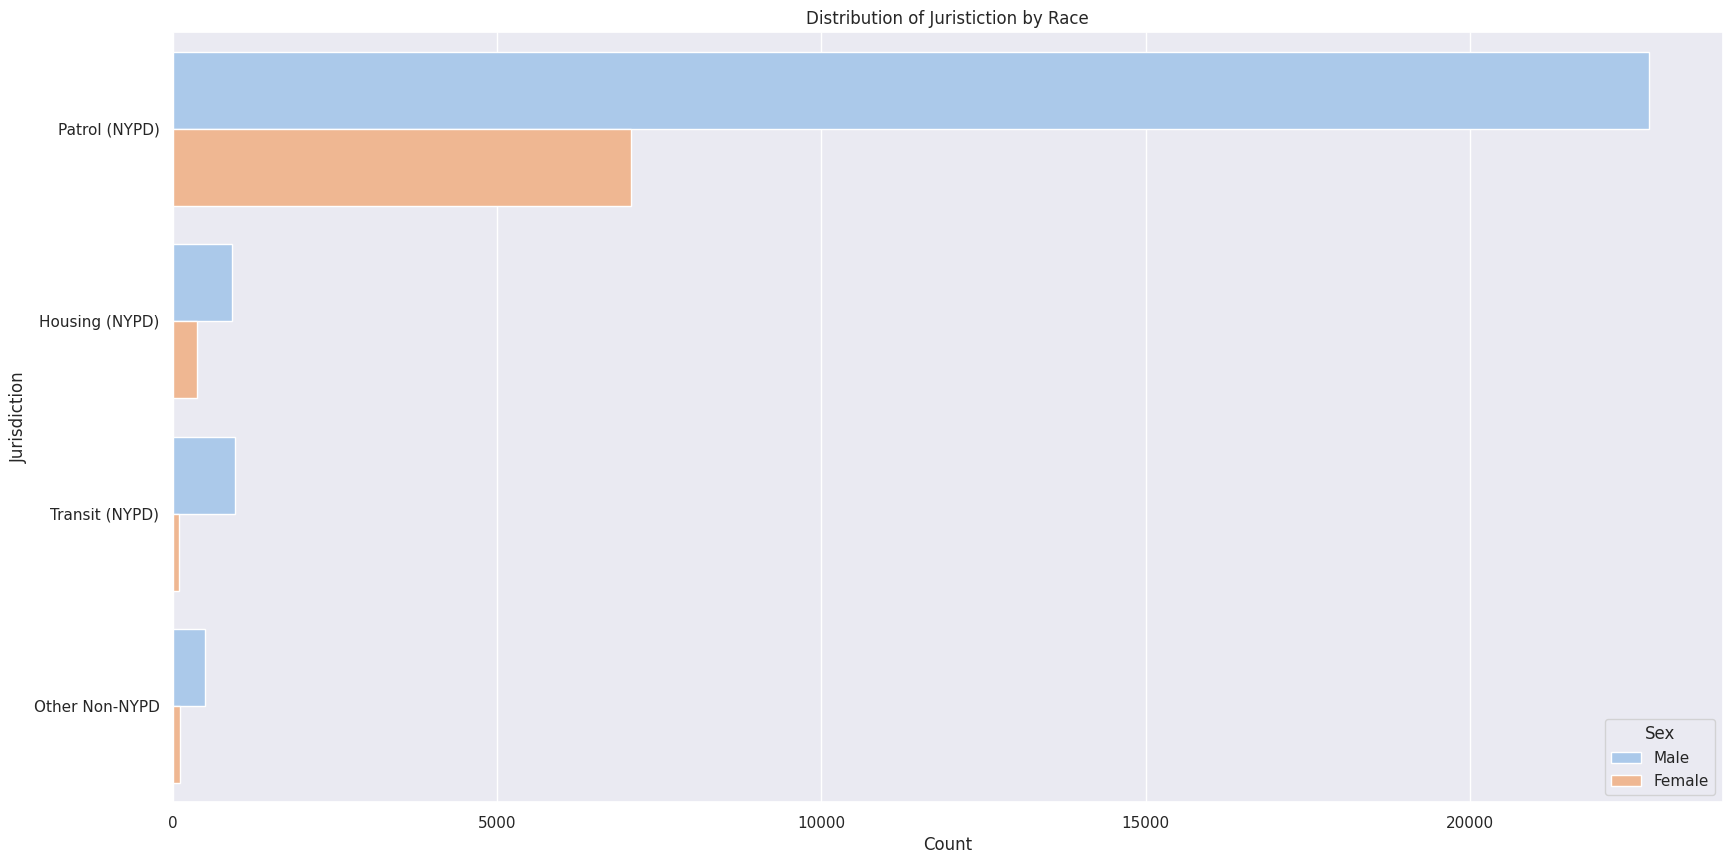

In [92]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='JURISDICTION_DESC', hue='PERP_SEX', order=df_adjusted['JURISDICTION_DESC'].value_counts().index)
plt.title('Distribution of Juristiction by Race')
plt.xlabel('Count')
plt.ylabel('Jurisdiction')
plt.legend(title='Sex')
plt.show()

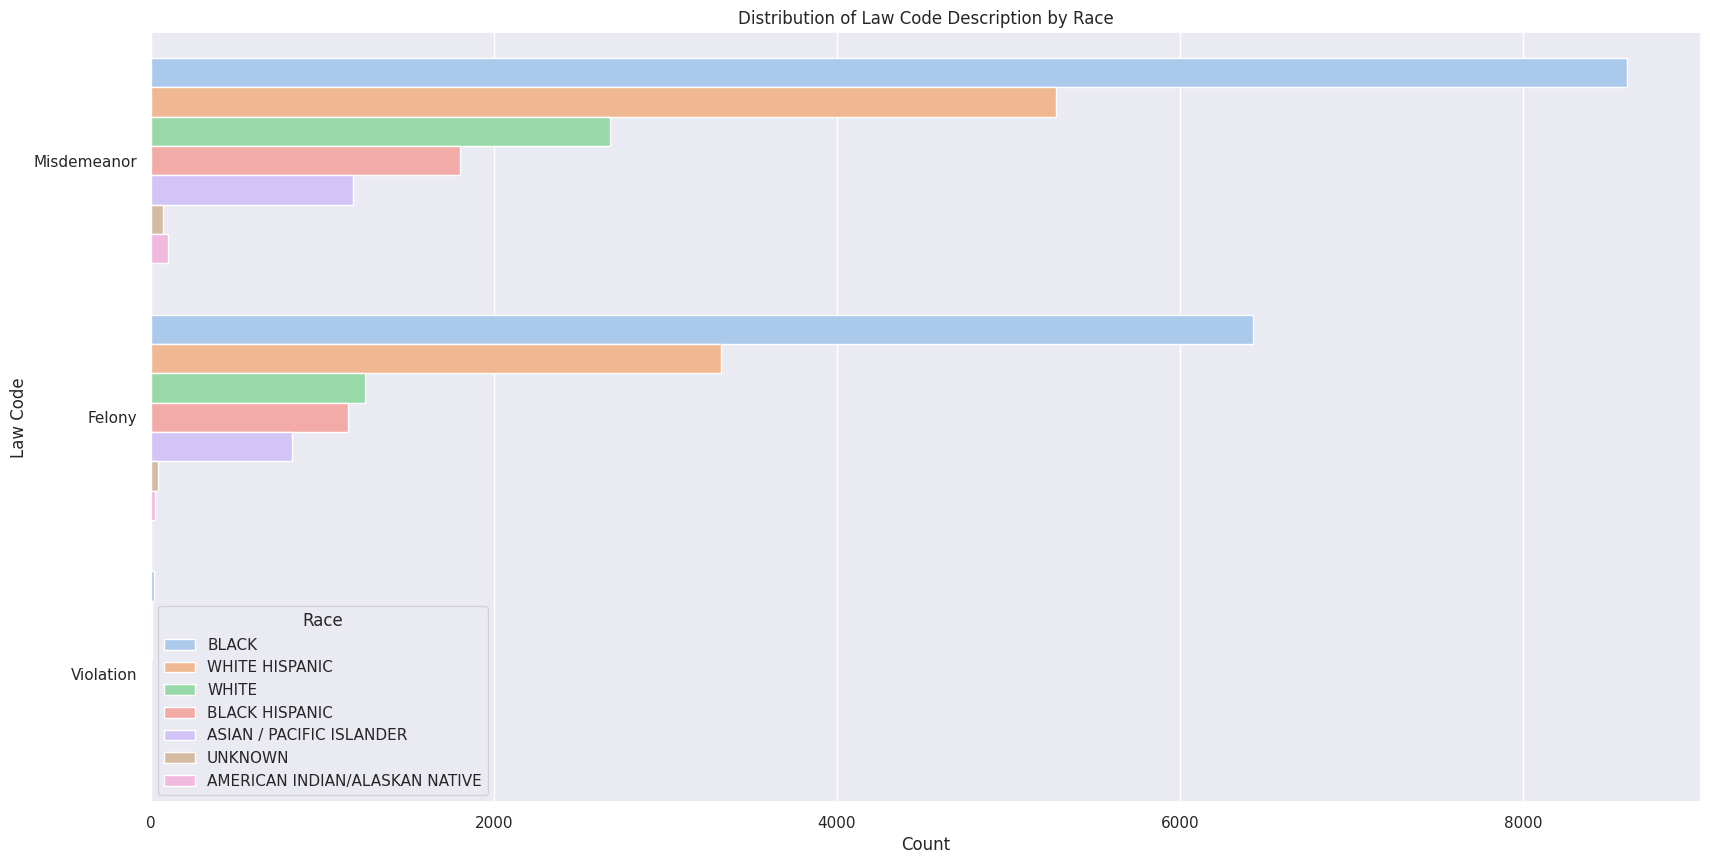

In [94]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='LAW_CAT_CD', hue='PERP_RACE', order=df_adjusted['LAW_CAT_CD'].value_counts().index)
plt.title('Distribution of Law Code Description by Race')
plt.xlabel('Count')
plt.ylabel('Law Code')
plt.legend(title='Race')
plt.show()

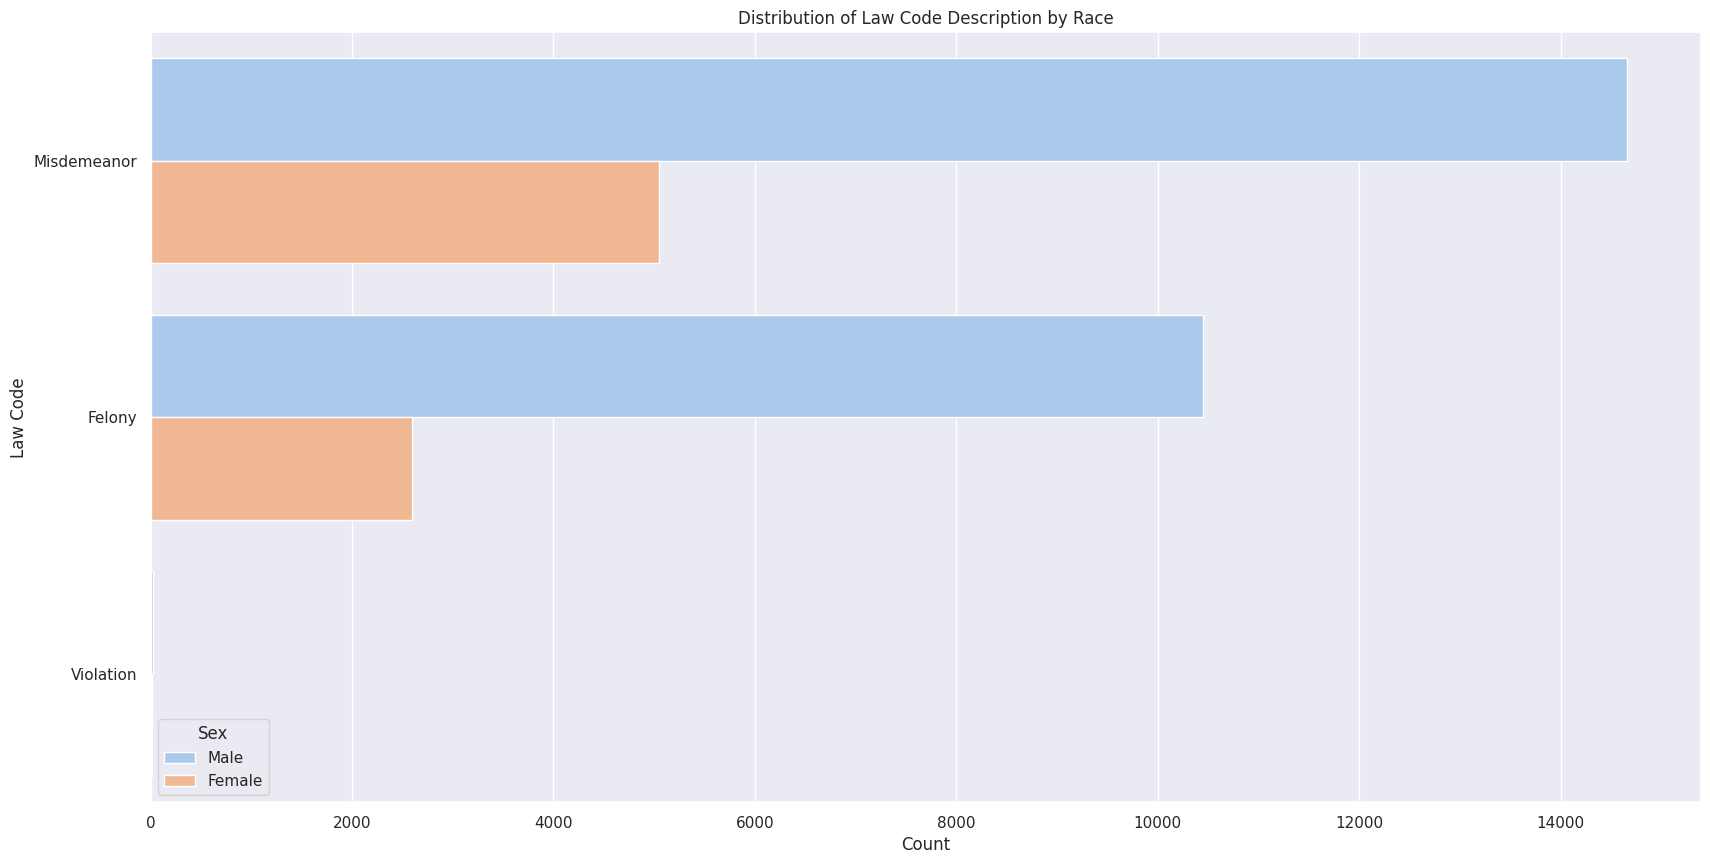

In [93]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_adjusted, y='LAW_CAT_CD', hue='PERP_SEX', order=df_adjusted['LAW_CAT_CD'].value_counts().index)
plt.title('Distribution of Law Code Description by Race')
plt.xlabel('Count')
plt.ylabel('Law Code')
plt.legend(title='Sex')
plt.show()

## Stats Testing

In [100]:
from scipy import stats

<Axes: xlabel='OFNS_DESC', ylabel='ARREST_BORO'>

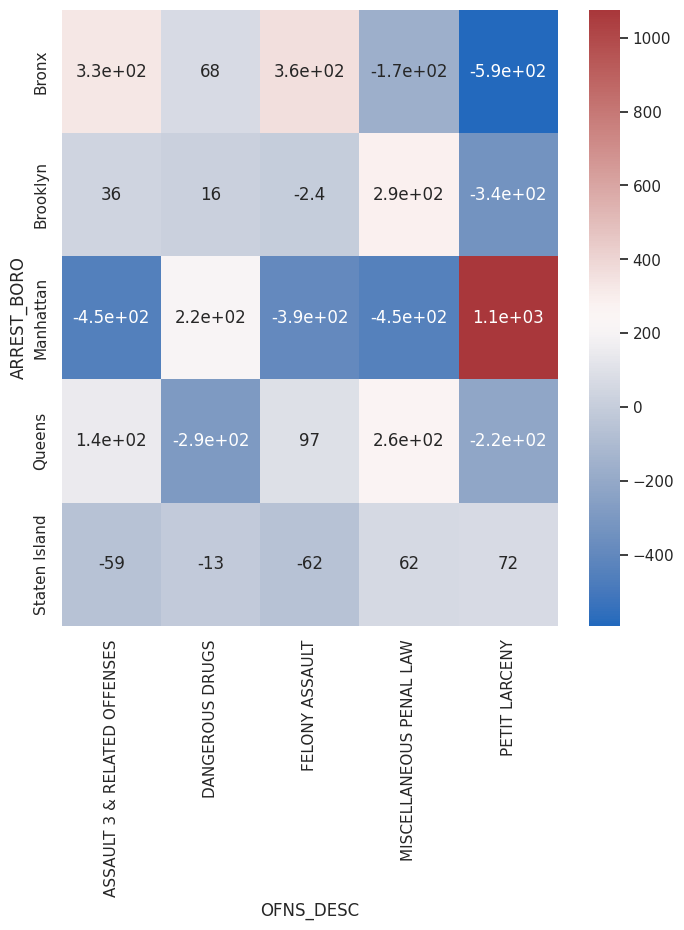

In [106]:
boro_table = pd.crosstab(df_adjusted['ARREST_BORO'], df_adjusted['OFNS_DESC'])
chi2 = stats.chi2_contingency(boro_table)
plt.figure(figsize = (8,8))
sns.heatmap(
    boro_table-chi2.expected_freq,
    cmap='vlag',
    annot=True
)

<Axes: xlabel='OFNS_DESC', ylabel='PERP_SEX'>

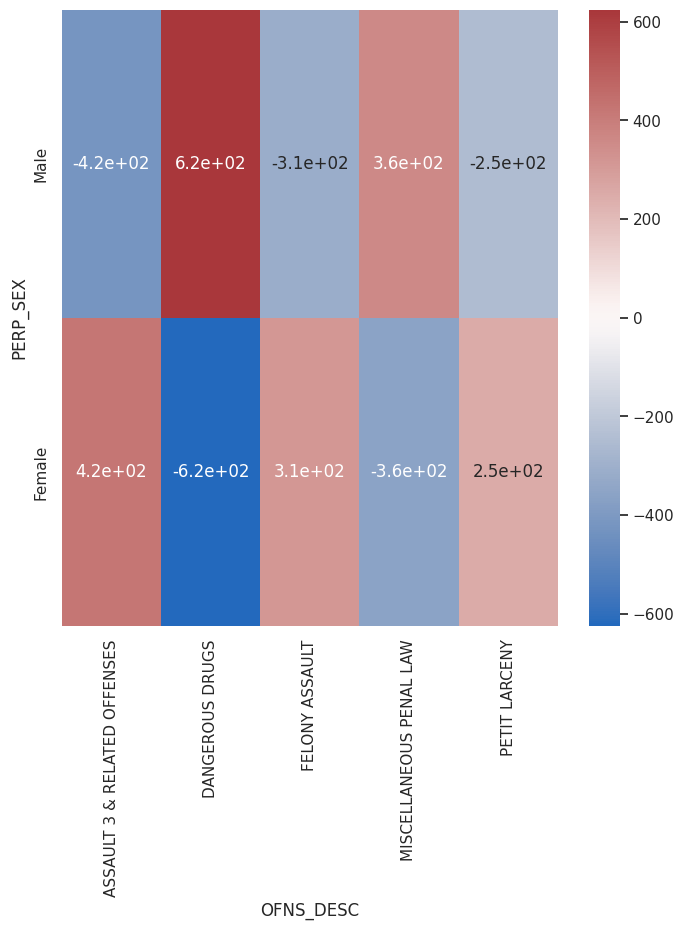

In [107]:
table = pd.crosstab(df_adjusted['PERP_SEX'], df_adjusted['OFNS_DESC'])
chi2 = stats.chi2_contingency(table)
plt.figure(figsize = (8,8))
sns.heatmap(
    table-chi2.expected_freq,
    cmap='vlag',
    annot=True
)

<Axes: xlabel='OFNS_DESC', ylabel='PERP_RACE'>

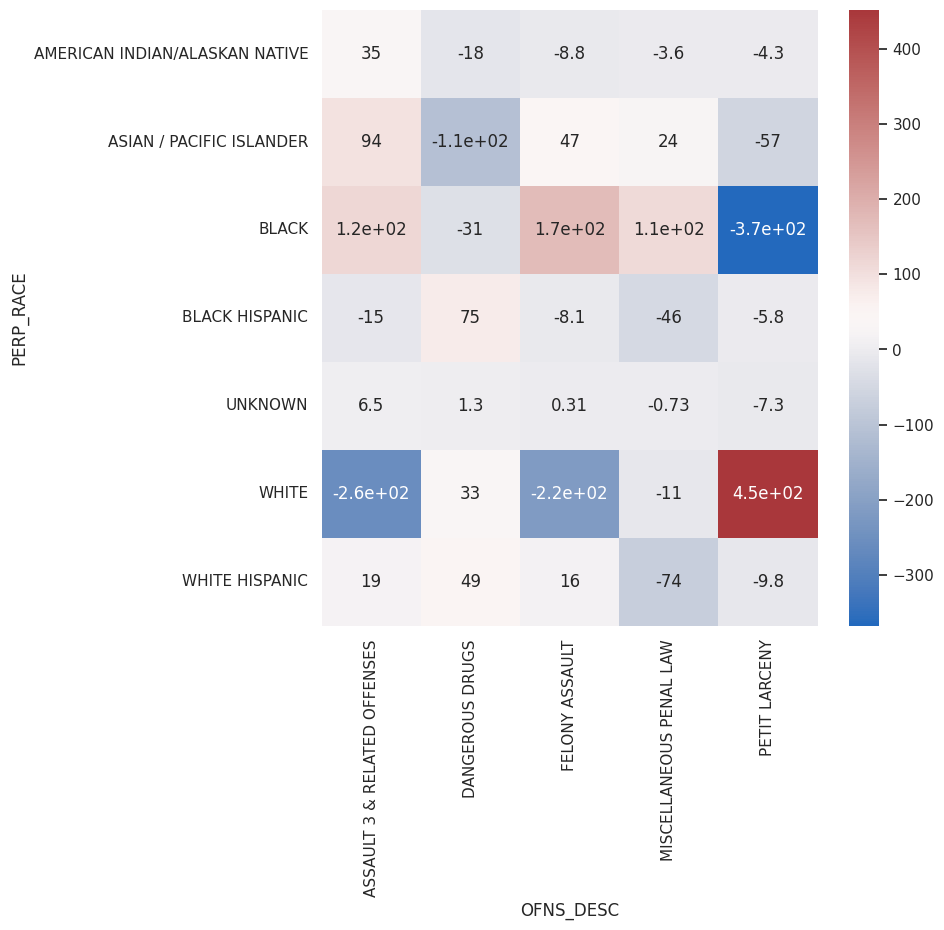

In [108]:
table = pd.crosstab(df_adjusted['PERP_RACE'], df_adjusted['OFNS_DESC'])
chi2 = stats.chi2_contingency(table)
plt.figure(figsize = (8,8))
sns.heatmap(
    table-chi2.expected_freq,
    cmap='vlag',
    annot=True
)

<Axes: xlabel='OFNS_DESC', ylabel='AGE_GROUP'>

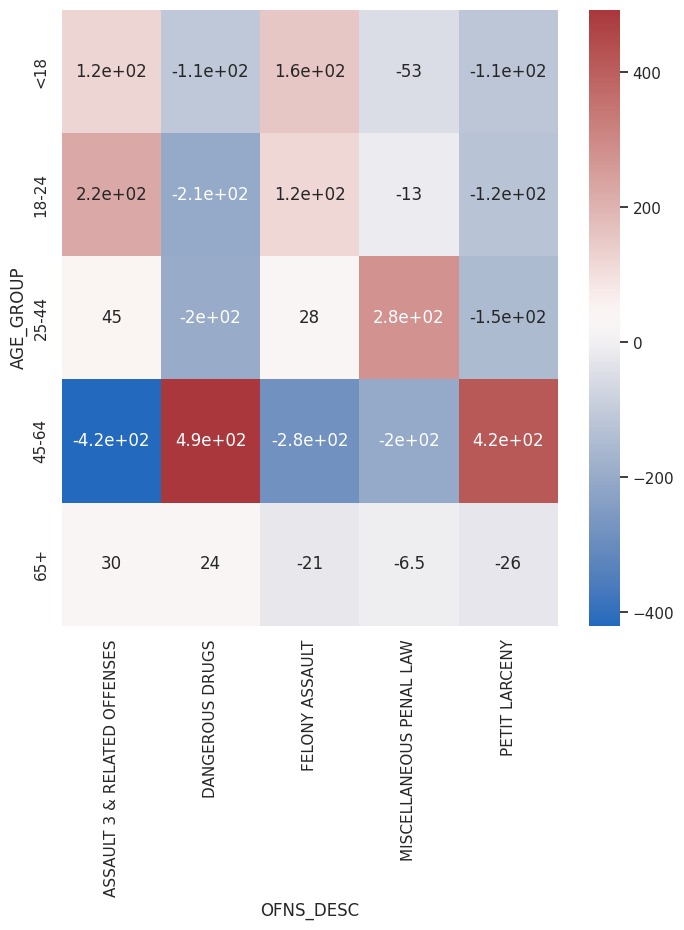

In [109]:
table = pd.crosstab(df_adjusted['AGE_GROUP'], df_adjusted['OFNS_DESC'])
chi2 = stats.chi2_contingency(table)
plt.figure(figsize = (8,8))
sns.heatmap(
    table-chi2.expected_freq,
    cmap='vlag',
    annot=True
)

## Machine Learning